In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

In [2]:
import os
import shutil
import random
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
import keras 
import os
import glob 
import cv2
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
import matplotlib.pyplot as plt

target_size = (224,224)
fruits = ["acerolas", "apples", "apricots", "avocados", "bananas", "blackberries", "blueberries", 
          "cantaloupes", "cherries", "coconuts", "figs", "grapefruits", "grapes", "guava", "kiwifruit", 
          "lemons", "limes", "mangos", "olives", "oranges", "passionfruit", "peaches", "pears", "pineapples", 
          "plums", "pomegranates", "raspberries", "strawberries", "tomatoes", "watermelons"]


for fruit in fruits:
    img_dir = f'C:\\Users\\DELL\\Downloads\\FIDS30\\{fruit}'
    data_path = os.path.join(img_dir, '*g')  # global path of the img_dir.....
    files = glob.glob(data_path)  # all the files inside the data path is here...
    
    save_dir = f'C:\\FIDS30\\{fruit}'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    for f1 in files:
        img = load_img(f1, target_size=target_size)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        i = 0
        path, dir, files = next(os.walk(img_dir))
        file_counts = len(files)
        for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix='a',
                                  save_format='jpg'):
            i += 1
            if i == 10:  # from each image 10 images will be generated in a new file
                break

In [4]:

dir_path = "C:\\FIDS30"
# Define the classes

classes = ["acerolas", "apples", "apricots", "avocados", "bananas", "blackberries", "blueberries", 
          "cantaloupes", "cherries", "coconuts", "figs", "grapefruits", "grapes", "guava", "kiwifruit", 
          "lemons", "limes", "mangos", "olives", "oranges", "passionfruit", "peaches", "pears", "pineapples", 
          "plums", "pomegranates", "raspberries", "strawberries", "tomatoes", "watermelons"]
# Define the training and testing directories

train_dir = "C:\\FIDS30\\train_dir"
test_dir = "C:\\FIDS30\\test_dir"
# Create the training and testing directories

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

for class_name in classes:
    class_dir = os.path.join(dir_path, class_name)
    image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith(".jpg") or f.endswith(".png")]
    train_files, test_files = train_test_split(image_files, test_size=0.1, random_state=42)
    # Copy the training files to the training directory
    for file_path in train_files:
        file_name = os.path.basename(file_path)
        new_file_path = os.path.join(train_dir, class_name, file_name)
        if not os.path.exists(os.path.join(train_dir, class_name)):
            os.makedirs(os.path.join(train_dir, class_name))
        shutil.copy(file_path, new_file_path)
    # Copy the testing files to the testing directory
    for file_path in test_files:
        file_name = os.path.basename(file_path)
        new_file_path = os.path.join(test_dir, class_name, file_name)
        if not os.path.exists(os.path.join(test_dir, class_name)):
            os.makedirs(os.path.join(test_dir, class_name))
        shutil.copy(file_path, new_file_path)

In [5]:
from tensorflow import keras

In [6]:
train_data='C:\\FIDS30\\train_dir'
test_data='C:\\FIDS30\\test_dir'

In [7]:
from sklearn.datasets import load_files

In [8]:
def get_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

X_train, Y_train, labels = get_data(train_data)
X_test, Y_test,_ = get_data(test_data)

In [9]:
from keras.utils import to_categorical

In [10]:
Y_train = to_categorical(Y_train, 30)
Y_test = to_categorical(Y_test, 30)

In [11]:
print(X_train.shape)
print(X_test.shape)

(8575,)
(969,)


In [12]:
X_train, X_val = train_test_split(X_train, test_size=0.1, random_state=42)
Y_train, Y_val = train_test_split(Y_train, test_size=0.1, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(7717,)
(969,)
(858,)


In [14]:
import keras 
import os
import glob 
import cv2
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
import matplotlib.pyplot as plt

def convert_image_to_array(files, target_size):
    images_as_array = []
    for file in files:
        img = load_img(file, target_size=target_size)  # Load and resize the image
        img_array = img_to_array(img)
        images_as_array.append(img_array)
    return images_as_array

# Define the target size for resizing

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(7717,)
(969,)
(858,)


In [15]:
target_size = (224, 224)

# Convert images to arrays
X_train = np.array(convert_image_to_array(X_train, target_size))
X_val = np.array(convert_image_to_array(X_val, target_size))
X_test = np.array(convert_image_to_array(X_test, target_size))


In [16]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

In [17]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense, Attention, Input

# Define the CNN model with attention
input_layer = Input(shape=(224, 224, 3))

# Convolutional layers
x = Conv2D(filters=16, kernel_size=2, padding='same')(input_layer)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=32, kernel_size=2, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=64, kernel_size=2, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=2, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)

# Applying attention after the last convolutional layer
attention = Attention()([x, x])

# Fully connected layers
x = Dropout(0.3)(attention)
x = Flatten()(x)
x = Dense(150, activation='relu')(x)
x = Dropout(0.4)(x)
output_layer = Dense(30, activation='softmax')(x)

# Creating the model with attention
model_with_attention = Model(inputs=input_layer, outputs=output_layer)

# Displaying the summary of the model
model_with_attention.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 16)         208       ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, 224, 224, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)         0         ['activation[0][0]']          
 D)                                                                                         

In [18]:
from keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
model_with_attention.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [19]:
history = model_with_attention.fit(X_train,Y_train,
        batch_size = 128,
        epochs=25,
        validation_data=(X_val, Y_val),
        verbose=2, shuffle=True)

Epoch 1/25


61/61 - 108s - loss: 3.0466 - accuracy: 0.1204 - val_loss: 2.4634 - val_accuracy: 0.2739 - 108s/epoch - 2s/step
Epoch 2/25
61/61 - 80s - loss: 2.3753 - accuracy: 0.2603 - val_loss: 2.0320 - val_accuracy: 0.3590 - 80s/epoch - 1s/step
Epoch 3/25
61/61 - 75s - loss: 2.0052 - accuracy: 0.3547 - val_loss: 1.6311 - val_accuracy: 0.4685 - 75s/epoch - 1s/step
Epoch 4/25
61/61 - 75s - loss: 1.7661 - accuracy: 0.4261 - val_loss: 1.4208 - val_accuracy: 0.5420 - 75s/epoch - 1s/step
Epoch 5/25
61/61 - 80s - loss: 1.6155 - accuracy: 0.4590 - val_loss: 1.2449 - val_accuracy: 0.6107 - 80s/epoch - 1s/step
Epoch 6/25
61/61 - 73s - loss: 1.4415 - accuracy: 0.5186 - val_loss: 1.1265 - val_accuracy: 0.6375 - 73s/epoch - 1s/step
Epoch 7/25
61/61 - 80s - loss: 1.3688 - accuracy: 0.5418 - val_loss: 1.0480 - val_accuracy: 0.6503 - 80s/epoch - 1s/step
Epoch 8/25
61/61 - 70s - loss: 1.2861 - accuracy: 0.5611 - val_loss: 1.0002 - val_accuracy: 0.6737 - 70s/epoch - 1s/step
Epoch 9/25
61/61 - 72s - los

In [20]:
score = model_with_attention.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

31/31 [==============================] - 3s 83ms/step - loss: 0.4888 - accuracy: 0.8277
Test accuracy: 0.8276574015617371


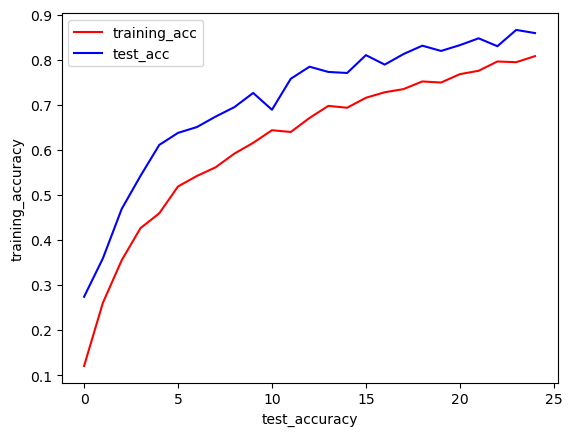

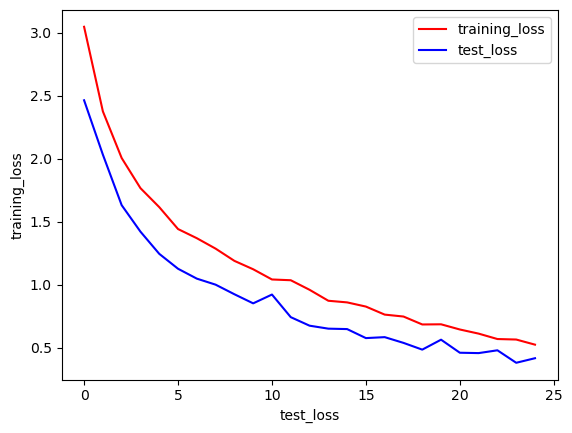

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red',label = 'training_acc')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'test_acc')
plt.ylabel('training_accuracy')
plt.xlabel('test_accuracy')
plt.legend()
plt.show()




plt.plot(history.history['loss'],color = 'red',label = 'training_loss')
plt.plot(history.history['val_loss'],color = 'blue',label = 'test_loss')
plt.ylabel('training_loss')
plt.xlabel('test_loss')
plt.legend()
plt.show()


31/31 [==============================] - 3s 84ms/step


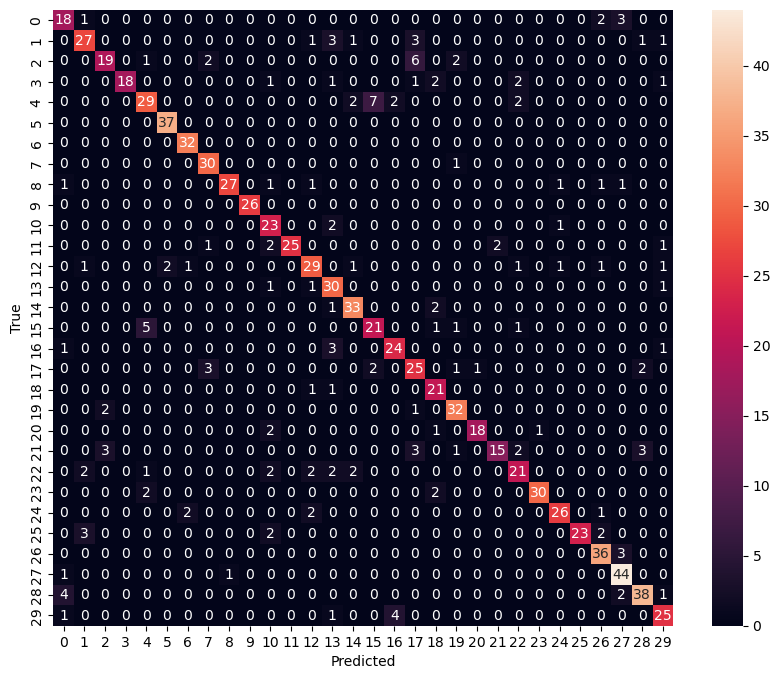

31/31 [==============================] - 3s 92ms/step - loss: 0.4888 - accuracy: 0.8277
Test accuracy is 0.8276574015617371 and test loss is 0.4888245761394501


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


y_pred = model_with_attention.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

confusion_mtx = confusion_matrix(np.argmax(Y_test, axis=1), y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

test_loss, test_acc = model_with_attention.evaluate(X_test, Y_test)
print(f"Test accuracy is {test_acc} and test loss is {test_loss}")


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on test set
Y_pred = model_with_attention.predict(X_test)
# Convert predictions to one-hot encoded labels
Y_pred_labels = np.argmax(Y_pred, axis=1)
Y_true_labels = np.argmax(Y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_true_labels, Y_pred_labels)

# Classification Report
class_report = classification_report(Y_true_labels, Y_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


31/31 [==============================] - 3s 84ms/step
Confusion Matrix:
[[18  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  2  3  0  0]
 [ 0 27  0  0  0  0  0  0  0  0  0  0  1  3  1  0  0  3  0  0  0  0  0  0
   0  0  0  0  1  1]
 [ 0  0 19  0  1  0  0  2  0  0  0  0  0  0  0  0  0  6  0  2  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  1  0  0  1  0  0  0  1  2  0  0  0  2  0
   0  0  0  0  0  1]
 [ 0  0  0  0 29  0  0  0  0  0  0  0  0  0  2  7  2  0  0  0  0  0  2  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0 27  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0
   1  0  1  1  0  0]
 [ 0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0